In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)


# 2D Example

1) Read in method 3 dataset

In [25]:
m3 = pd.read_csv('Method3Final.csv')
m3 = m3.drop(['Unnamed: 0'], axis=1)
m3.head()

,Hospital Name,Surgery,Doctors,Service/Staff,Childcare,Recovery,ER,Facility,Diagnosis,Comfort,Nurses,Hospital overall rating,Address,City,State,ZIP Code,Phone Number
0,ST CHARLES MADRAS,2.531739,4.1,3.966621,2.798817,4.000000,4.363969,4.094043,3.064075,2.166667,2.752794,4,470 NE A STREET,MADRAS,OR,97741,5414753882
1,ST CHARLES MADRAS,3.930862,4.1,2.516264,3.224325,4.000000,3.820454,3.579075,3.018484,2.166667,3.825877,4,470 NE A STREET,MADRAS,OR,97741,5414753882
2,SACRED HEART MEDICAL CENTER - RIVERBEND,1.980755,3.9,1.583333,2.500000,4.256414,3.603080,3.874796,3.546042,3.237500,3.291667,3,3333 RIVERBEND DRIVE,SPRINGFIELD,OR,97477,5412227300
3,SACRED HEART MEDICAL CENTER - RIVERBEND,4.244263,3.9,1.500000,2.500000,6.663020,3.051558,3.896577,4.755443,3.375000,3.041667,3,3333 RIVERBEND DRIVE,SPRINGFIELD,OR,97477,5412227300
4,SACRED HEART MEDICAL CENTER - RIVERBEND,2.518294,3.9,1.583333,2.500000,5.404494,3.434447,4.417671,3.960452,3.487500,2.876712,3,3333 RIVERBEND DRIVE,SPRINGFIELD,OR,97477,5412227300


2) Picked 2 random features to evaluate. I picked Surgery and Doctors. 


3) I then plotted them

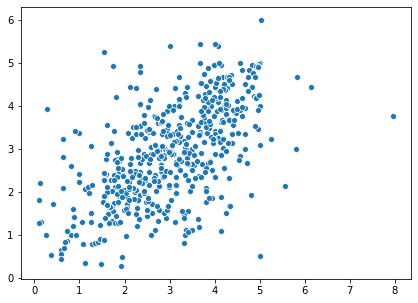

In [31]:
f1 = np.array(m3.iloc[:,1])
f2 = np.array(m3.iloc[:,3])
X = np.array(list(zip(f1, f2))) # makes them like coordinates ((x1,y1), (x2,y2) , .... (xk,yk))
#plt.scatter(f1, f2, c='black', s=7)
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x=f1, y=f2, data=m3)

4) Created Distance function to check distances from each centroid.

In [32]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)


5) Created two random centroids

In [34]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X), size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[4. 3.]
 [3. 5.]
 [6. 0.]]


6) Plotted centroids

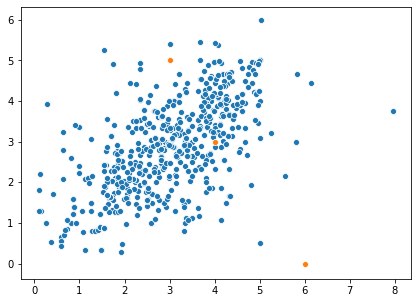

In [36]:
#plt.scatter(f1, f2, c='#050505', s=7)
#plt.scatter(C_x, C_y, marker='*', s=200, c='g')
plt.figure(figsize=(7,5))

ax = sns.scatterplot(x=f1, y=f2, data=m3)
ax = sns.scatterplot(x=C_x, y=C_y, data=m3)

7) Applied K-means Algorithm

In [37]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = copy.deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

8) Plotted the clusters

[1.7202866 4.172608  3.037779 ]


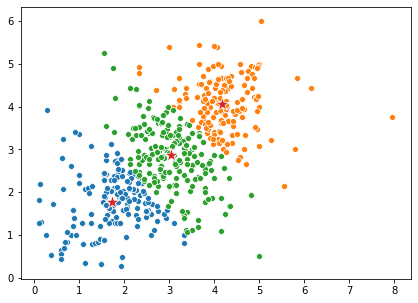

In [39]:
#colors = ['r', 'g', 'b', 'y', 'c', 'm']
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
plt.figure(figsize=(7,5))

#fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        #ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        ax = sns.scatterplot(x=points[:, 0], y=points[:, 1], data=m3, palette=cmap)
        #print(points[:, 0])
        
ax = sns.scatterplot(C[:, 0], C[:, 1], data=m3, s=200, marker="*")
#ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
print(C[:,0])

# 3D Example

2) Picked three random features to evaluate. I picked Surgery (0), Doctors (2), Service/Staff (3)
 
It was easier to visually show what cluster the users preferences belonged to by only looking at 3 features. It is not possible to plot a 10D graph.

In [47]:
f1 = np.array(m3.iloc[:,1])
f2 = np.array(m3.iloc[:,2])
f3 = np.array(m3.iloc[:,3])
X = np.array(list(zip(f1, f2, f3)))
print(X)

[[2.53173939 4.1        3.96662091]
 [3.9308621  4.1        2.51626439]
 [1.98075522 3.9        1.58333333]
 ...
 [3.96628305 4.34222776 3.2357768 ]
 [2.05523006 2.44765427 2.25734003]
 [3.32928676 3.07699556 2.92260698]]


3) Plotted each coordinate on axis

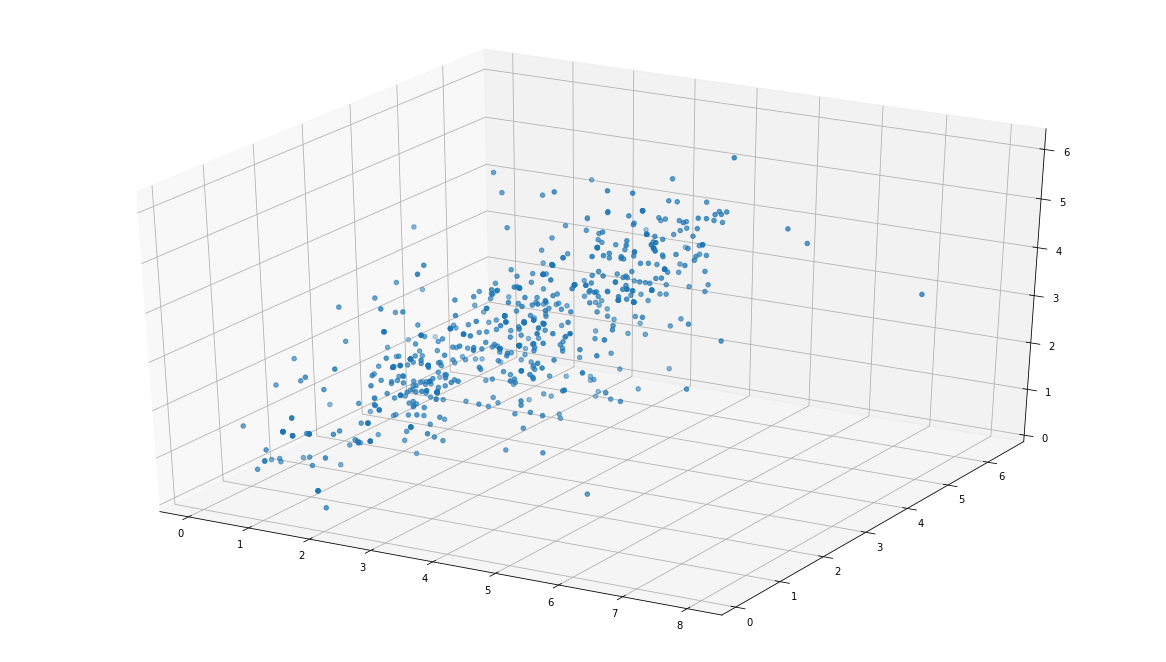

In [48]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

4) Applied kmeans algorithm to matrix X

In [49]:
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

5) Created a user vector to assign rating preferences for each feature.

Surgery = 5 rating </b>

Doctors = 3 rating </b>

Service/Staff = 2 rating </b>

6) Figured out the smallest distance between each point within the X vector. Whichever one was the smallest distance was the the reccommneded hospital for the user

In [50]:
user = [5,3,2]
best = []
summ = 0
bestsumm = 10 
for i in X:
    dist = np.linalg.norm(user-i)
    if dist < bestsumm:
        bestsumm = dist
        best = i
print(best)

[4.81433672 2.69549906 1.93333333]


7) Showed what cluster the hospital belonged too. The best hospital is marked with a red cross

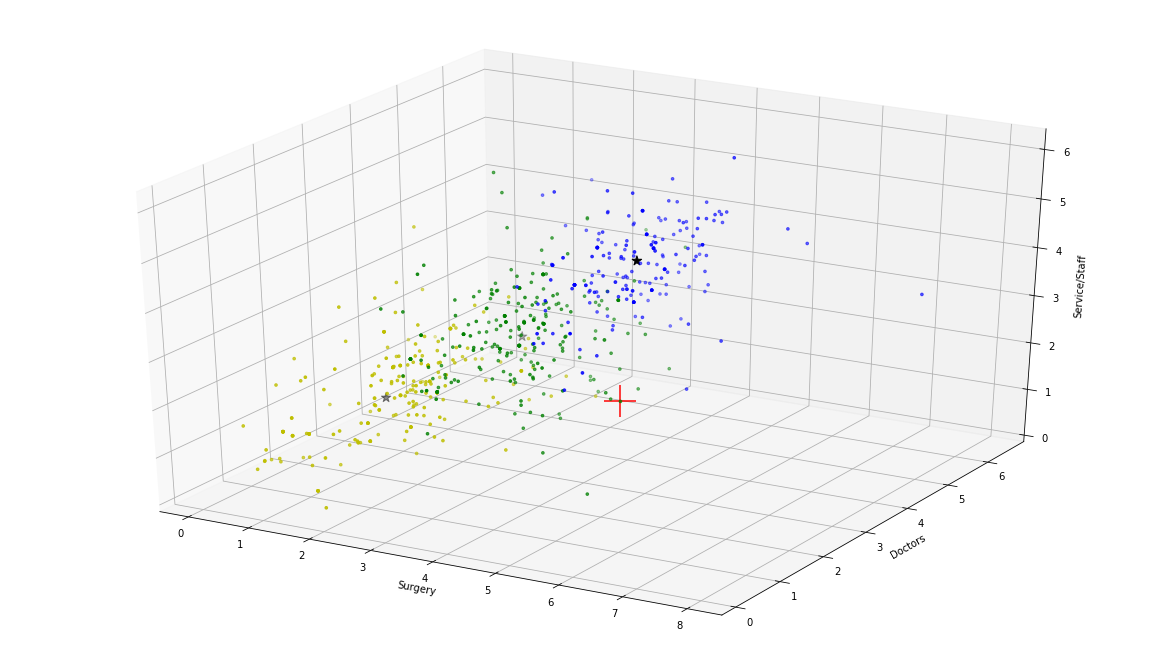

In [51]:
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(X[:, 0], X[:, 1], X[:, 2])
colors = ['y', 'b','g']
for i in range(3):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        #print(points)
        ax.scatter(points[:, 0], points[:, 1], points[:, 2],  s=7, c=colors[i])
        #ax.scatter(X[:, 0], X[:, 1], X[:, 2], s=7, c=colors[i])
plt.xlabel("Surgery")
plt.ylabel("Doctors")
ax.set_zlabel('Service/Staff')

ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='black', s=100)
ax.scatter(best[0], best[1], best[2], marker='+', c='red', s=1000)

In [23]:
index_list = m3[(m3['Surgery'] == best[0])&(m3['Doctors'] == best[1])&(m3['Service/Staff'] == best[2])].index.tolist()
print(index_list)
print('Hospital: ',m3.iloc[124, 0])
m3.iloc[124, 12:16]


[124]
Hospital:  SWEDISH EDMONDS HOSPITAL


Address     21601 76TH AVENUE WEST
City                       EDMONDS
State                           WA
ZIP Code                     98026
Name: 124, dtype: object

# Kmeans with ALL of the features:

In [40]:
f1 = np.array(m3.iloc[:,1])
f2 = np.array(m3.iloc[:,2])
f3 = np.array(m3.iloc[:,3])
f4 = np.array(m3.iloc[:,4])
f5 = np.array(m3.iloc[:,5])
f6 = np.array(m3.iloc[:,6])
f7 = np.array(m3.iloc[:,7])
f8 = np.array(m3.iloc[:,8])
f9 = np.array(m3.iloc[:,9])
f10 = np.array(m3.iloc[:,10])

Xall = np.array(list(zip(f1, f2, f3, f4, f5, f6, f7, f8, f9, f10)))
#print(X)

In [41]:
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
kmeans = kmeans.fit(Xall)
# Predicting the clusters
labels = kmeans.predict(Xall)
# Getting the cluster centers
C = kmeans.cluster_centers_

In [42]:
a = input("Please enter your the level of importance of Surgery to you for a hospital from a scale of 1-5: ")

#if (a < 1) or (a > 5) or (a.is_integer() == False):
 #   print('Sorry that was not an integer from 1-5! ')
  #  a = input("Please enter your the level of importance of Surgery to you for a hospital from a scale of 1-5: ")
    #a = int(a)
    
b = input("Please enter your the level of importance of Doctors to you for a hospital from a scale of 1-5: ")
c = input("Please enter your the level of importance of Service/Staff to you for a hospital from a scale of 1-5:")
d = input("Please enter your the level of importance of Childcare to you for a hospital from a scale of 1-5:")
e = input("Please enter your the level of importance of Recovery to you for a hospital from a scale of 1-5:")
f = input("Please enter your the level of importance of ER to you for a hospital from a scale of 1-5:")
g = input("Please enter your the level of importance of Facility to you for a hospital from a scale of 1-5:")
h = input("Please enter your the level of importance of Diagnosis to you for a hospital from a scale of 1-5: ")
i = input("Please enter your the level of importance of Comfort to you for a hospital from a scale of 1-5: ")
j = input("Please enter your the level of importance of Nurses to you for a hospital from a scale of 1-5: ")
print(" Surgery =  " + a,'\n', 'Doctors = ' + b, '\n','Service/Staff = ' + c,'\n','Childcare = ' + d, 
      '\n','Recovery = ' + e, '\n','ER = ' + f, '\n','Facility = ' + g, '\n','Diagnosis = ' + h, 
      '\n','Comfort = ' + i, '\n','Nurses = ' + j)

Please enter your the level of importance of Surgery to you for a hospital from a scale of 1-5: 3
Please enter your the level of importance of Doctors to you for a hospital from a scale of 1-5: 4
Please enter your the level of importance of Service/Staff to you for a hospital from a scale of 1-5:2
Please enter your the level of importance of Childcare to you for a hospital from a scale of 1-5:4
Please enter your the level of importance of Recovery to you for a hospital from a scale of 1-5:5
Please enter your the level of importance of ER to you for a hospital from a scale of 1-5:1
Please enter your the level of importance of Facility to you for a hospital from a scale of 1-5:3
Please enter your the level of importance of Diagnosis to you for a hospital from a scale of 1-5: 4
Please enter your the level of importance of Comfort to you for a hospital from a scale of 1-5: 5
Please enter your the level of importance of Nurses to you for a hospital from a scale of 1-5: 3
 Surgery =  3 
 Doc

In [43]:
a = int(a)
b = int(b)
c = int(c)
d = int(d)
e = int(e)
f = int(f)
g = int(g)
h = int(h)
i = int(i)
j = int(j)

user = [a,b,c,d,e,f,g,h,i,j]
best = []
summ = 0
bestsumm = 10 
for i in Xall:
    dist = np.linalg.norm(user-i)
    if dist < bestsumm:
        bestsumm = dist
        best = i
print(best)

[3.32       4.1        1.38888889 2.14285714 5.38308869 2.48115079
 3.05446238 3.64910165 4.55555556 3.80471915]


In [44]:
index_list = m3[(m3['Surgery'] == best[0])&(m3['Doctors'] == best[1])&
                (m3['Service/Staff'] == best[2])& (m3['Childcare'] == best[3])&
               (m3['Recovery'] == best[4])&(m3['ER'] == best[5])&(m3['Facility'] == best[6])&
               (m3['Diagnosis'] == best[7])&(m3['Comfort'] == best[8])&
                (m3['Nurses'] == best[9])].index.tolist()

In [45]:
index_list
print('Hospital: ',m3.iloc[index_list, 0])
m3.iloc[index_list, 12:16]

Hospital:  99    PROVIDENCE ST VINCENT MEDICAL CENTER
Name: Hospital Name, dtype: object


,Address,City,State,ZIP Code
99,9205 SW BARNES ROAD,PORTLAND,OR,97225
